In [4]:
# Here, we are going to extract edges from images
# 256x256

In [38]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def image_to_edge(image):
    # 1. convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. perform the canny edge detector to detect image edges
    # TODO: ovde ne znam kako tacno thresholdi uticu na ekstrakcije,
    #       ako bude trebalo da se vraca na to, vratiti se
    edges = cv2.Canny(gray, threshold1=30, threshold2=100)
    
    return ~edges

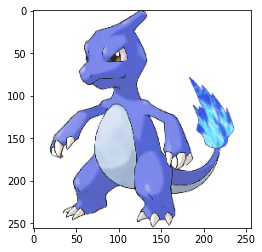

In [40]:
image = cv2.imread("../data/pokemon_jpg/5.jpg")
plt.imshow(image)
plt.show()

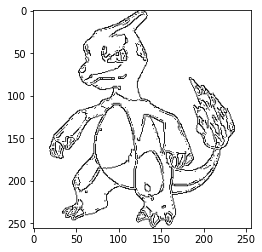

In [41]:
edges = image_to_edge(image)
plt.imshow(edges, cmap="gray")
plt.show()

In [56]:
# filelist = []

# for root, dirs, files in os.walk('../data/pokemon_jpg/'):
#     filelist = filelist + [os.path.join(root, x) for x in files if x.endswith(('.jpg', '.png'))]  

# path = '../data/edge_jpg'

# if not os.path.exists(path):
#     os.makedirs(path)
# else:
#     # Removes all the subdirectories!
#     shutil.rmtree(path)           
#     os.makedirs(path)
    
# for img in filelist:
#     img_name = img.split("/")[-1]
#     image = cv2.imread(img)
#     edge_image = image_to_edge(image)
    
#     cv2.imwrite(os.path.join(path, img_name), edge_image)

### ApproxPolyDP

In [81]:
def image_to_approx_poly_dp(imageread):
    image_edge_poly = np.ones((imageread.shape[0], 
                               imageread.shape[1], 
                               3))

    #converting the input image to grayscale image using cvtColor() function
    imagegray = cv2.cvtColor(imageread, 
                             cv2.COLOR_RGB2GRAY)

    threshold_param = 30
    #using threshold() function to convert the grayscale image to binary image
    _, imagethreshold = cv2.threshold(imagegray, 
                                      threshold_param, 
                                      255, 
                                      cv2.THRESH_BINARY_INV)

    #finding the contours in the given image using findContours() function
    imagecontours, _ = cv2.findContours(imagethreshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    contour_sum = 0
    for contour in imagecontours:
        contour_sum += contour.sum()
            
    andja_threshold_empirical = 250000
    while contour_sum < andja_threshold_empirical:
        threshold_param += 30
        #using threshold() function to convert the grayscale image to binary image
        _, imagethreshold = cv2.threshold(imagegray, 
                                          threshold_param, 
                                          255, 
                                          cv2.THRESH_BINARY_INV)

        #finding the contours in the given image using findContours() function
        imagecontours, _ = cv2.findContours(imagethreshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        contour_sum = 0
        for contour in imagecontours:
            contour_sum += contour.sum()
        
        
    #for each of the contours detected, the shape of the contours is approximated using approxPolyDP() function and the contours are drawn in the image using drawContours() function
    for count in imagecontours:
        epsilon = 0.01 * cv2.arcLength(count, True)
        approximations = cv2.approxPolyDP(count, epsilon, True)
        cv2.drawContours(image_edge_poly, [approximations], 0, (0), 2)
    
    return image_edge_poly

In [82]:
filelist = []

for root, dirs, files in os.walk('../data/pokemon_jpg/'):
    filelist = filelist + [os.path.join(root, x) for x in files if x.endswith(('.jpg', '.png'))]  

path = '../data/sketch_jpg'

if not os.path.exists(path):
    os.makedirs(path)
else:
    # Removes all the subdirectories!
    shutil.rmtree(path)           
    os.makedirs(path)
    
for img in filelist:
    img_name = img.split("/")[-1]
    image = cv2.imread(img)
    print(img)

    sketch_image = image_to_approx_poly_dp(image)
    
    cv2.imwrite(os.path.join(path, img_name), 255*sketch_image)

../data/pokemon_jpg/1.jpg
../data/pokemon_jpg/10.jpg
../data/pokemon_jpg/100.jpg
../data/pokemon_jpg/101.jpg
../data/pokemon_jpg/102.jpg
../data/pokemon_jpg/103.jpg
../data/pokemon_jpg/104.jpg
../data/pokemon_jpg/105.jpg
../data/pokemon_jpg/106.jpg
../data/pokemon_jpg/107.jpg
../data/pokemon_jpg/108.jpg
../data/pokemon_jpg/109.jpg
../data/pokemon_jpg/11.jpg
../data/pokemon_jpg/110.jpg
../data/pokemon_jpg/111.jpg
../data/pokemon_jpg/112.jpg
../data/pokemon_jpg/113.jpg
../data/pokemon_jpg/114.jpg
../data/pokemon_jpg/115-mega.jpg
../data/pokemon_jpg/115.jpg
../data/pokemon_jpg/116.jpg
../data/pokemon_jpg/117.jpg
../data/pokemon_jpg/118.jpg
../data/pokemon_jpg/119.jpg
../data/pokemon_jpg/12.jpg
../data/pokemon_jpg/120.jpg
../data/pokemon_jpg/121.jpg
../data/pokemon_jpg/122.jpg
../data/pokemon_jpg/123.jpg
../data/pokemon_jpg/124.jpg
../data/pokemon_jpg/125.jpg
../data/pokemon_jpg/126.jpg
../data/pokemon_jpg/127-mega.jpg
../data/pokemon_jpg/127.jpg
../data/pokemon_jpg/128.jpg
../data/pokemon

../data/pokemon_jpg/341.jpg
../data/pokemon_jpg/342.jpg
../data/pokemon_jpg/343.jpg
../data/pokemon_jpg/344.jpg
../data/pokemon_jpg/345.jpg
../data/pokemon_jpg/346.jpg
../data/pokemon_jpg/347.jpg
../data/pokemon_jpg/348.jpg
../data/pokemon_jpg/349.jpg
../data/pokemon_jpg/35.jpg
../data/pokemon_jpg/350.jpg
../data/pokemon_jpg/351.jpg
../data/pokemon_jpg/352.jpg
../data/pokemon_jpg/353.jpg
../data/pokemon_jpg/354-mega.jpg
../data/pokemon_jpg/354.jpg
../data/pokemon_jpg/355.jpg
../data/pokemon_jpg/356.jpg
../data/pokemon_jpg/357.jpg
../data/pokemon_jpg/358.jpg
../data/pokemon_jpg/359-mega.jpg
../data/pokemon_jpg/359.jpg
../data/pokemon_jpg/36.jpg
../data/pokemon_jpg/360.jpg
../data/pokemon_jpg/361.jpg
../data/pokemon_jpg/362-mega.jpg
../data/pokemon_jpg/362.jpg
../data/pokemon_jpg/363.jpg
../data/pokemon_jpg/364.jpg
../data/pokemon_jpg/365.jpg
../data/pokemon_jpg/366.jpg
../data/pokemon_jpg/367.jpg
../data/pokemon_jpg/368.jpg
../data/pokemon_jpg/369.jpg
../data/pokemon_jpg/37.jpg
../data/

../data/pokemon_jpg/580.jpg
../data/pokemon_jpg/581.jpg
../data/pokemon_jpg/582.jpg
../data/pokemon_jpg/583.jpg
../data/pokemon_jpg/584.jpg
../data/pokemon_jpg/585-autumn.jpg
../data/pokemon_jpg/585-spring.jpg
../data/pokemon_jpg/585-summer.jpg
../data/pokemon_jpg/585-winter.jpg
../data/pokemon_jpg/586-autumn.jpg
../data/pokemon_jpg/586-spring.jpg
../data/pokemon_jpg/586-summer.jpg
../data/pokemon_jpg/586-winter.jpg
../data/pokemon_jpg/587.jpg
../data/pokemon_jpg/588.jpg
../data/pokemon_jpg/589.jpg
../data/pokemon_jpg/59.jpg
../data/pokemon_jpg/590.jpg
../data/pokemon_jpg/591.jpg
../data/pokemon_jpg/592.jpg
../data/pokemon_jpg/592f.jpg
../data/pokemon_jpg/593.jpg
../data/pokemon_jpg/593f.jpg
../data/pokemon_jpg/594.jpg
../data/pokemon_jpg/595.jpg
../data/pokemon_jpg/596.jpg
../data/pokemon_jpg/597.jpg
../data/pokemon_jpg/598.jpg
../data/pokemon_jpg/599.jpg
../data/pokemon_jpg/6-mega-x.jpg
../data/pokemon_jpg/6-mega-y.jpg
../data/pokemon_jpg/6.jpg
../data/pokemon_jpg/60.jpg
../data/poke